<a href="https://colab.research.google.com/github/scheshmi/CS-SBU-MachineLearning-BSc-2022/blob/98222027/submits/98222027/project1/Apartment_rental_offers_in_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading Dataset from Kaggle


In [1]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

100% 93.0M/93.0M [00:00<00:00, 162MB/s]
100% 93.0M/93.0M [00:00<00:00, 142MB/s]


In [3]:
!unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


#Loading dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv('immo_data.csv')

In [6]:
dataset.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

#Preprocessing

In [8]:
dataset.isnull().sum()/len(dataset)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

Delete columns which over 50% of them is null

In [9]:
bad_cols = dataset.columns[dataset.isnull().sum()/len(dataset) > 0.5]

In [10]:
bad_cols

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [11]:
dataset.drop(columns=bad_cols,inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  int64  
 7   pricetrend            267018 non-null  float64
 8   telekomUploadSpeed    235492 non-null  float64
 9   totalRent             228333 non-null  float64
 10  yearConstructed       211805 non-null  float64
 11  scoutId               268850 non-null  int64  
 12  firingTypes           211886 non-null  object 
 13  hasKitchen            268850 non-null  bool   
 14  geo_bln               268850 non-null  object 
 15  

delete unuseful and uninformative columns

In [13]:
unuseful_cols = ['date','description','scoutId','picturecount',"facilities",'houseNumber',
                  'livingSpaceRange','yearConstructedRange','baseRentRange','noRoomsRange']
dataset.drop(columns=unuseful_cols,inplace=True)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   regio1              268850 non-null  object 
 1   serviceCharge       261941 non-null  float64
 2   heatingType         223994 non-null  object 
 3   telekomTvOffer      236231 non-null  object 
 4   newlyConst          268850 non-null  bool   
 5   balcony             268850 non-null  bool   
 6   pricetrend          267018 non-null  float64
 7   telekomUploadSpeed  235492 non-null  float64
 8   totalRent           228333 non-null  float64
 9   yearConstructed     211805 non-null  float64
 10  firingTypes         211886 non-null  object 
 11  hasKitchen          268850 non-null  bool   
 12  geo_bln             268850 non-null  object 
 13  cellar              268850 non-null  bool   
 14  baseRent            268850 non-null  float64
 15  livingSpace         268850 non-nul

In [15]:
dataset.street

0          Sch&uuml;ruferstra&szlig;e
1                      no_information
2                           Turnerweg
3         Gl&uuml;ck-Auf-Stra&szlig;e
4         Hermann-Henrich-Meier-Allee
                     ...             
268845                 no_information
268846                 no_information
268847                 Emsbachstrasse
268848                Idastra&szlig;e
268849      Robert-Di&szlig;mann-Str.
Name: street, Length: 268850, dtype: object

In [16]:
dataset.streetPlain.nunique()

54490

street and streetPlain are uninformative, too

In [17]:
dataset.drop(['street','streetPlain'],axis=1,inplace=True)

Duplicated records

In [18]:
dataset.duplicated().sum()

2247

In [19]:
dataset.drop_duplicates(keep='last',inplace=True)

In [20]:
dataset.duplicated().sum()

0

fill totalRent null values with its median

In [21]:
dataset.totalRent.isnull().sum()

40171

In [22]:
print(dataset.totalRent.median())

650.0


In [23]:
dataset.totalRent.fillna(dataset.totalRent.median(),inplace=True)

deleting rows where baseRent is greater than or equal to totalRent, totalRent equals to 0 or greater than 10000

In [24]:
dataset[dataset.baseRent >= dataset.totalRent].loc[:,['baseRent','totalRent']]

,baseRent,totalRent
1,800.0,650.0
21,1190.0,1190.0
28,2400.0,2400.0
32,2780.0,2780.0
46,2190.0,2190.0
...,...,...
268700,980.0,980.0
268747,652.0,650.0
268752,1290.0,1290.0
268807,825.0,825.0


In [25]:
dataset.drop(dataset[dataset.baseRent >= dataset.totalRent].index,inplace=True)

In [26]:
dataset.drop(dataset[dataset.totalRent == 0 ].index,inplace=True)

In [27]:
dataset.drop(dataset[dataset['totalRent']>10000].index,inplace=True)

Also, livingSpace equals to 0 does not make sense!!

In [28]:
dataset.drop(dataset[dataset['livingSpace'] == 0].index,inplace=True)

filling null values of numerical columns with their mean

In [29]:
dataset._get_numeric_data().isnull().sum()

serviceCharge          3929
newlyConst                0
balcony                   0
pricetrend             1676
telekomUploadSpeed    29017
totalRent                 0
yearConstructed       52004
hasKitchen                0
cellar                    0
baseRent                  0
livingSpace               0
lift                      0
geo_plz                   0
noRooms                   0
thermalChar           96182
floor                 44484
numberOfFloors        86549
garden                    0
dtype: int64

In [88]:
numerical_cols = dataset.select_dtypes(exclude=['bool','object'])

In [31]:
dataset.fillna(numerical_cols.mean(),inplace=True)

filling null values of categorical columns with their mode

In [32]:
dataset.isnull().sum()

regio1                     0
serviceCharge              0
heatingType            38736
telekomTvOffer         28348
newlyConst                 0
balcony                    0
pricetrend                 0
telekomUploadSpeed         0
totalRent                  0
yearConstructed            0
firingTypes            51001
hasKitchen                 0
geo_bln                    0
cellar                     0
baseRent                   0
livingSpace                0
geo_krs                    0
condition              61513
interiorQual          100996
petsAllowed           103536
lift                       0
typeOfFlat             31956
geo_plz                    0
noRooms                    0
thermalChar                0
floor                      0
numberOfFloors             0
garden                     0
regio2                     0
regio3                     0
dtype: int64

In [33]:
categorical_cols = dataset.select_dtypes(include=['bool','object'])

In [34]:
categorical_cols.isnull().sum()

regio1                 0
heatingType        38736
telekomTvOffer     28348
newlyConst             0
balcony                0
firingTypes        51001
hasKitchen             0
geo_bln                0
cellar                 0
geo_krs                0
condition          61513
interiorQual      100996
petsAllowed       103536
lift                   0
typeOfFlat         31956
garden                 0
regio2                 0
regio3                 0
dtype: int64

In [35]:
dataset.fillna(categorical_cols.mode().iloc[0],inplace= True)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245495 entries, 0 to 268848
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   regio1              245495 non-null  object 
 1   serviceCharge       245495 non-null  float64
 2   heatingType         245495 non-null  object 
 3   telekomTvOffer      245495 non-null  object 
 4   newlyConst          245495 non-null  bool   
 5   balcony             245495 non-null  bool   
 6   pricetrend          245495 non-null  float64
 7   telekomUploadSpeed  245495 non-null  float64
 8   totalRent           245495 non-null  float64
 9   yearConstructed     245495 non-null  float64
 10  firingTypes         245495 non-null  object 
 11  hasKitchen          245495 non-null  bool   
 12  geo_bln             245495 non-null  object 
 13  cellar              245495 non-null  bool   
 14  baseRent            245495 non-null  float64
 15  livingSpace         245495 non-nul

Finding outliers

In [37]:
def detect_outlier(df,col_name):
  """
  Find indexes of outliers by computing z-score

  Parameters
  ----------
  df : pd.DataFrame
       dataframe of dataset 
  col_name : str
             name of column you want to find outliers in
  Returns
  -------
  indexes : pd.Index
            indexes of outliers
  """

  upper = df[col_name].mean() + 3 * df[col_name].std()
  lower = df[col_name].mean() - 3 * df[col_name].std()

  indexes = df[(df[col_name] > upper) | (df[col_name] < lower)].index
  return indexes

In [38]:
dataset.shape

(245495, 30)

In [39]:
for col in dataset.columns:
  if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
    outlier_indexes = detect_outlier(dataset,col)
    dataset.drop(outlier_indexes,inplace=True)

In [40]:
dataset.shape

(230510, 30)

In [41]:
for col in dataset.columns:
  if dataset[col].dtype == 'object' or dataset[col].dtype == 'bool':
    print(f'{col} has {dataset[col].nunique()} states')

regio1 has 16 states
heatingType has 13 states
telekomTvOffer has 3 states
newlyConst has 2 states
balcony has 2 states
firingTypes has 115 states
hasKitchen has 2 states
geo_bln has 16 states
cellar has 2 states
geo_krs has 419 states
condition has 10 states
interiorQual has 4 states
petsAllowed has 3 states
lift has 2 states
typeOfFlat has 10 states
garden has 2 states
regio2 has 419 states
regio3 has 8444 states


In [42]:
categorical_cols.nunique()

regio1              16
heatingType         13
telekomTvOffer       3
newlyConst           2
balcony              2
firingTypes        118
hasKitchen           2
geo_bln             16
cellar               2
geo_krs            419
condition           10
interiorQual         4
petsAllowed          3
lift                 2
typeOfFlat          10
garden               2
regio2             419
regio3            8526
dtype: int64

delete categorical columns which has too many states

In [43]:
dataset.drop(columns=['firingTypes','geo_krs','regio2','regio3','geo_bln'],inplace=True)

reduce number of states in some columns

In [44]:
for col in dataset.columns:
  if dataset[col].dtype == 'object' or dataset[col].dtype == 'bool':
    if dataset[col].nunique() > 5:
      print(f'{col} has {dataset[col].nunique()} states')

regio1 has 16 states
heatingType has 13 states
condition has 10 states
typeOfFlat has 10 states


In [45]:
dataset.regio1.value_counts()*100/len(dataset)

Nordrhein_Westfalen       24.182465
Sachsen                   23.703093
Sachsen_Anhalt             8.402672
Bayern                     6.686044
Niedersachsen              6.230532
Hessen                     5.678279
Baden_Württemberg          5.021474
Thüringen                  3.490087
Rheinland_Pfalz            3.018958
Brandenburg                2.824606
Mecklenburg_Vorpommern     2.753460
Berlin                     2.611600
Schleswig_Holstein         2.592946
Hamburg                    1.151360
Bremen                     1.142250
Saarland                   0.510173
Name: regio1, dtype: float64

In [46]:
def new_label_regio1(col):
  """
  Return new label of regio1 column for instance

  Parameters
  ----------
  col : pd.Series
        regio1 column of dataset
  
  Returns
  -------
  int
      return other if regio1  of instance is one of selected names otherwise col
  """
  if col in ['Berlin','Brandenburg','Mecklenburg_Vorpommern',
             'Schleswig_Holstein','Hamburg','Bremen','Saarland']:
    return 'other'
  else:
    return col

dataset['new_regio1'] = dataset.regio1.apply(new_label_regio1)
dataset.drop('regio1',axis=1,inplace=True)

In [47]:
dataset.new_regio1.value_counts()

Nordrhein_Westfalen    55743
Sachsen                54638
other                  31318
Sachsen_Anhalt         19369
Bayern                 15412
Niedersachsen          14362
Hessen                 13089
Baden_Württemberg      11575
Thüringen               8045
Rheinland_Pfalz         6959
Name: new_regio1, dtype: int64

In [48]:
dataset.heatingType.value_counts()*100/len(dataset)

central_heating                   65.199774
district_heating                   9.520628
gas_heating                        7.637847
self_contained_central_heating     6.954145
floor_heating                      5.733808
oil_heating                        1.950458
heat_pump                          0.889766
combined_heat_and_power_plant      0.710598
night_storage_heater               0.533599
wood_pellet_heating                0.351829
electric_heating                   0.337946
stove_heating                      0.121036
solar_heating                      0.058566
Name: heatingType, dtype: float64

In [49]:
def new_label_heatingType(col):
  """
  Return new label of heatingType column for instance

  Parameters
  ----------
  col : pd.Series
        heatingType column of dataset
  
  Returns
  -------
  int
      return other if heatingType of instance is not one of selected names otherwise col
  """
  if col not in ['central_heating','district_heating','gas_heating','self_contained_central_heating','floor_heating','oil_heating']:
    return 'other'
  else:
    return col


dataset['new_heatingType'] = dataset.heatingType.apply(new_label_heatingType)
dataset.drop(columns='heatingType',inplace=True)

In [50]:
dataset.new_heatingType.value_counts()

central_heating                   150292
district_heating                   21946
gas_heating                        17606
self_contained_central_heating     16030
floor_heating                      13217
other                               6923
oil_heating                         4496
Name: new_heatingType, dtype: int64

In [51]:
dataset.condition.value_counts()*100/len(dataset)

well_kept                             51.392998
refurbished                           10.796061
fully_renovated                       10.082426
mint_condition                         7.345885
first_time_use                         6.715544
modernized                             6.663485
first_time_use_after_refurbishment     5.572860
negotiable                             0.881957
need_of_renovation                     0.547048
ripe_for_demolition                    0.001735
Name: condition, dtype: float64

In [52]:
def new_label_condition(col):
  """
  Return new label of condition column for instance

  Parameters
  ----------
  col : pd.Series
        condition column of dataset
  
  Returns
  -------
  int
      return other if condition of instance is one of selected names otherwise col
  """
  if col in ['negotiable','need_of_renovation','ripe_for_demolition']:
    return 'other'
  else:
    return col

dataset['new_condition'] = dataset.condition.apply(new_label_condition)
dataset.drop(columns='condition',inplace=True)

In [53]:
dataset.new_condition.value_counts()

well_kept                             118466
refurbished                            24886
fully_renovated                        23241
mint_condition                         16933
first_time_use                         15480
modernized                             15360
first_time_use_after_refurbishment     12846
other                                   3298
Name: new_condition, dtype: int64

In [54]:
dataset.typeOfFlat.value_counts()*100/len(dataset)

apartment              62.982951
roof_storey            13.408963
ground_floor           11.893627
other                   3.616763
maisonette              2.921348
raised_ground_floor     2.183419
terraced_flat           1.140948
penthouse               0.796061
half_basement           0.781745
loft                    0.274175
Name: typeOfFlat, dtype: float64

In [55]:
def new_label_typeOfFlat(col):
  """
  Return new label of typeOfFlat column for instance

  Parameters
  ----------
  col : pd.Series
        typeOfFlat column of dataset
  
  Returns
  -------
  int
      return other if typeOfFlat of instance is one of selected names otherwise col
  """
  if col  in ['penthouse','half_basement','loft']:
    return 'other'
  else:
    return col
dataset['new_typeOfFlat'] = dataset.typeOfFlat.apply(new_label_typeOfFlat)
dataset.drop(columns='typeOfFlat',inplace=True)

In [56]:
dataset.new_typeOfFlat.value_counts()

apartment              145182
roof_storey             30909
ground_floor            27416
other                   12606
maisonette               6734
raised_ground_floor      5033
terraced_flat            2630
Name: new_typeOfFlat, dtype: int64

In [57]:
for col in dataset.columns:
  if dataset[col].dtype == 'object' or dataset[col].dtype == 'bool':
    print(f'{col} has {dataset[col].nunique()} classes')

telekomTvOffer has 3 classes
newlyConst has 2 classes
balcony has 2 classes
hasKitchen has 2 classes
cellar has 2 classes
interiorQual has 4 classes
petsAllowed has 3 classes
lift has 2 classes
garden has 2 classes
new_regio1 has 10 classes
new_heatingType has 7 classes
new_condition has 8 classes
new_typeOfFlat has 7 classes


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230510 entries, 0 to 268848
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       230510 non-null  float64
 1   telekomTvOffer      230510 non-null  object 
 2   newlyConst          230510 non-null  bool   
 3   balcony             230510 non-null  bool   
 4   pricetrend          230510 non-null  float64
 5   telekomUploadSpeed  230510 non-null  float64
 6   totalRent           230510 non-null  float64
 7   yearConstructed     230510 non-null  float64
 8   hasKitchen          230510 non-null  bool   
 9   cellar              230510 non-null  bool   
 10  baseRent            230510 non-null  float64
 11  livingSpace         230510 non-null  float64
 12  interiorQual        230510 non-null  object 
 13  petsAllowed         230510 non-null  object 
 14  lift                230510 non-null  bool   
 15  geo_plz             230510 non-nul

#EDA

In [59]:
dataset.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,geo_plz,noRooms,thermalChar,floor,numberOfFloors
count,230510.000000,230510.000000,230510.000000,230510.000000,230510.000000,230510.000000,230510.000000,230510.00000,230510.000000,230510.000000,230510.000000,230510.000000
mean,141.456676,3.181025,28.775797,720.478734,1966.355402,544.397086,69.216290,35638.64310,2.554026,113.736766,2.065441,3.501604
std,66.584204,1.818176,15.319725,339.244509,32.957049,300.449551,25.887654,27367.63815,0.915568,35.306456,1.358424,1.372021
min,0.000000,-2.540000,1.000000,5.900000,1841.000000,0.000000,1.000000,852.00000,1.000000,0.100000,-1.000000,0.000000
25%,94.000000,1.890000,10.000000,478.000000,1958.000000,324.700000,53.000000,9113.00000,2.000000,98.200000,1.000000,3.000000
50%,130.000000,3.250000,40.000000,650.000000,1965.228357,450.000000,65.000000,36275.00000,2.500000,115.608540,2.000000,3.582468
75%,177.625000,4.360000,40.000000,870.000000,1989.000000,690.000000,82.000000,53113.00000,3.000000,117.000000,3.000000,4.000000
max,1000.000000,9.150000,40.000000,2262.000000,2029.000000,1577.340000,400.000000,99998.00000,10.000000,257.700000,11.000000,19.000000


Distributions of numerical columns

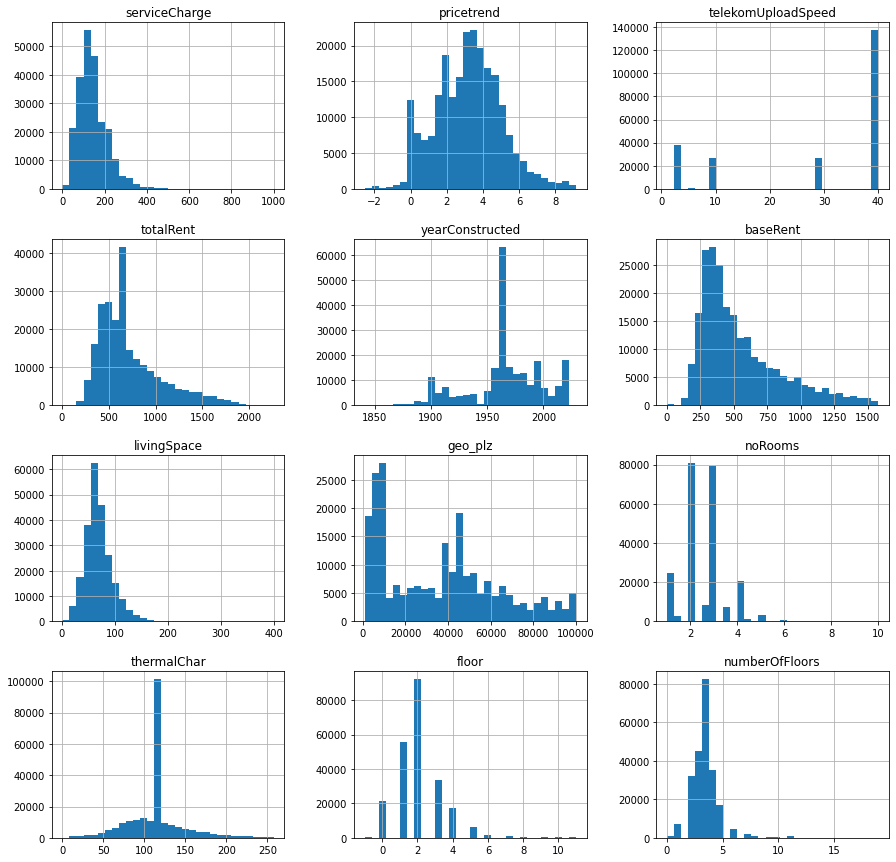

In [60]:
dataset.hist(figsize=(15,15),bins=30)
plt.show()

Distribution of baseRent and totalRent

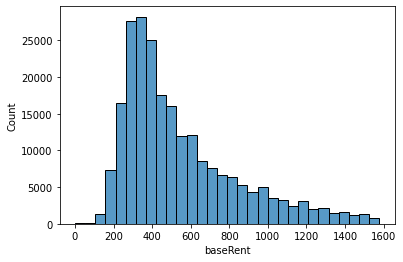

In [61]:
sns.histplot(data=dataset,x='baseRent',bins=30 )

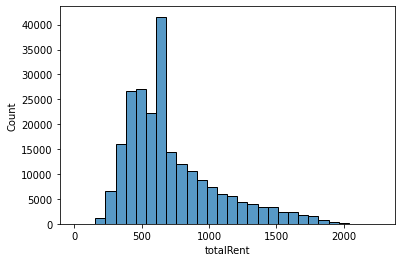

In [62]:
sns.histplot(x=dataset['totalRent'],bins=30)

Distributions of categorical features

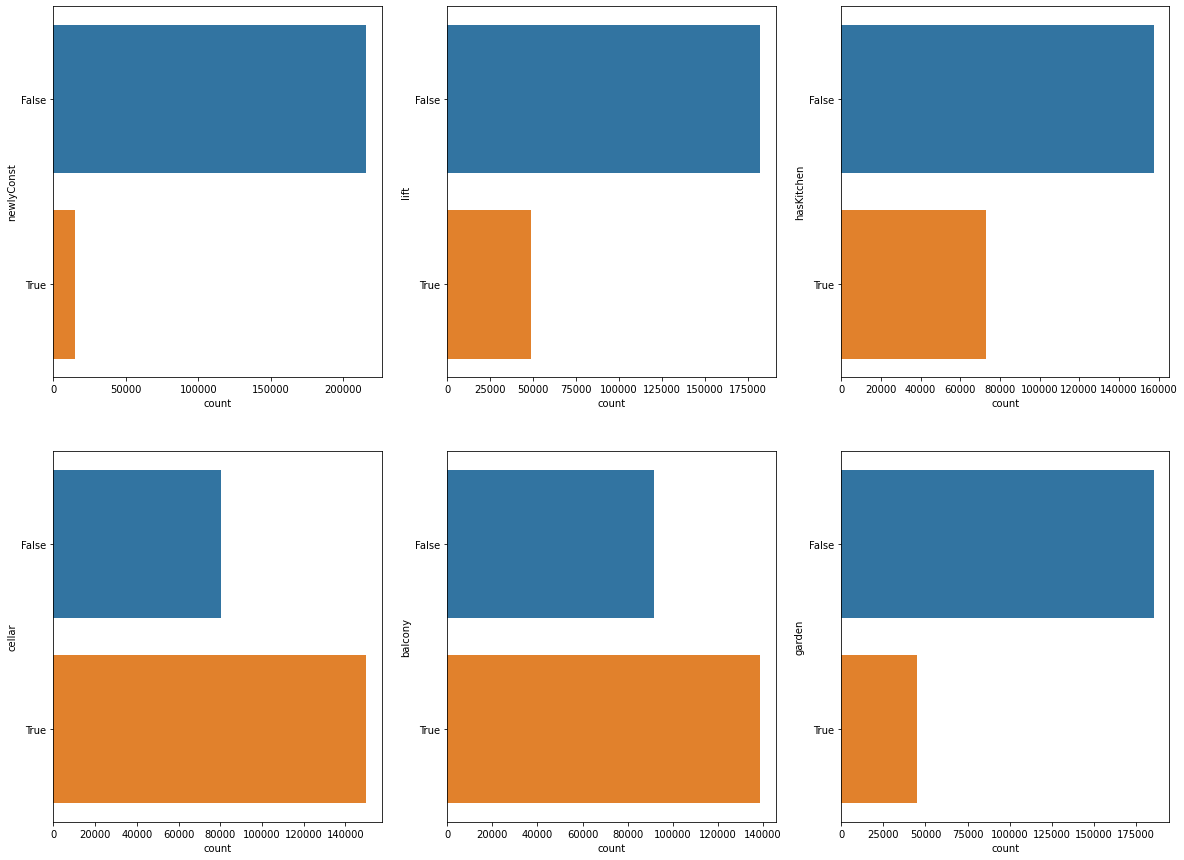

In [63]:
fig ,axs = plt.subplots(2,3)
fig.set_figheight(15)
fig.set_figwidth(20)
i=0
for col in dataset.columns:
  if dataset[col].dtype == 'bool':
    sns.countplot(y=dataset[col],orient='h',ax=axs[i%2,i%3])
    i+=1
fig.show()

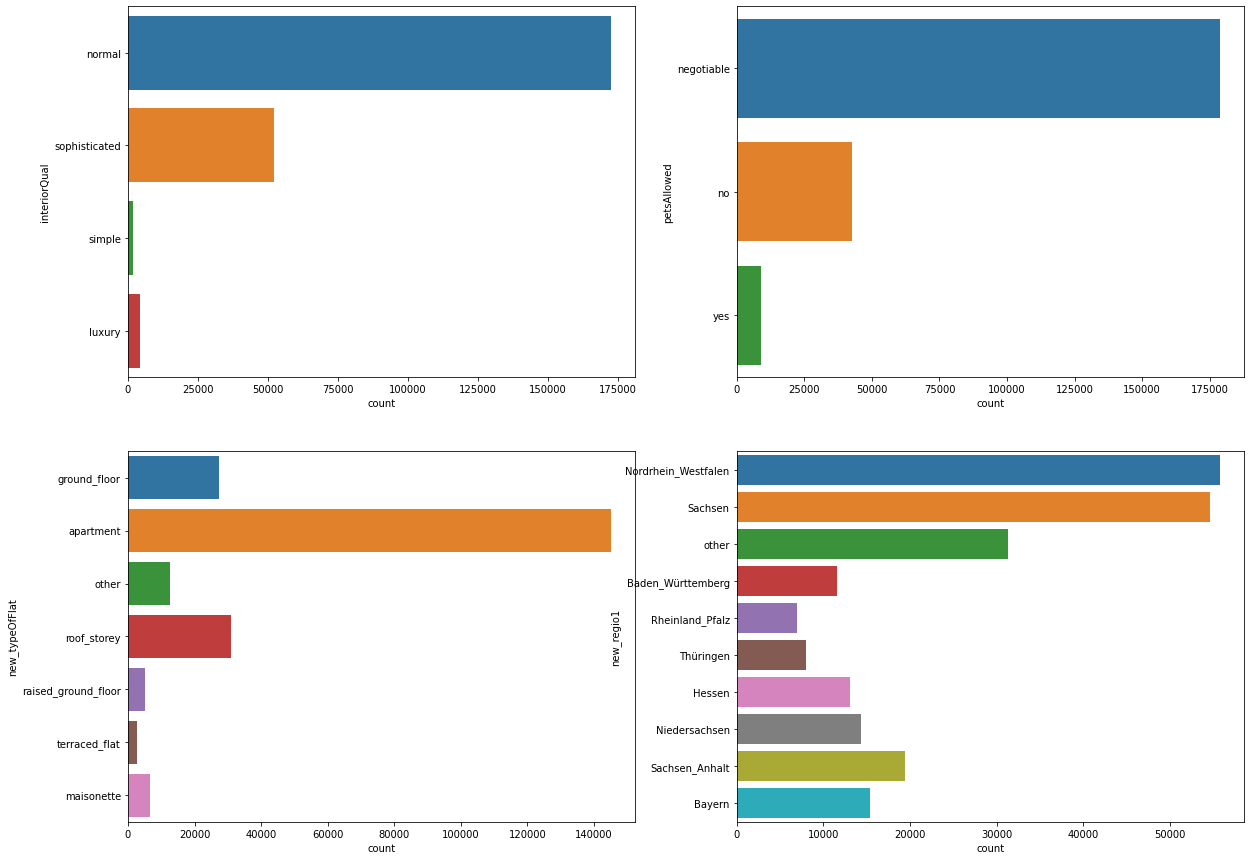

In [64]:
fig ,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(20)

sns.countplot(y=dataset.interiorQual,orient='v',ax=axs[0,0])
sns.countplot(y=dataset.petsAllowed,orient='v',ax=axs[0,1])
sns.countplot(y=dataset.new_typeOfFlat,orient='v',ax=axs[1,0])
sns.countplot(y=dataset.new_regio1,orient='v',ax=axs[1,1])
fig.show()

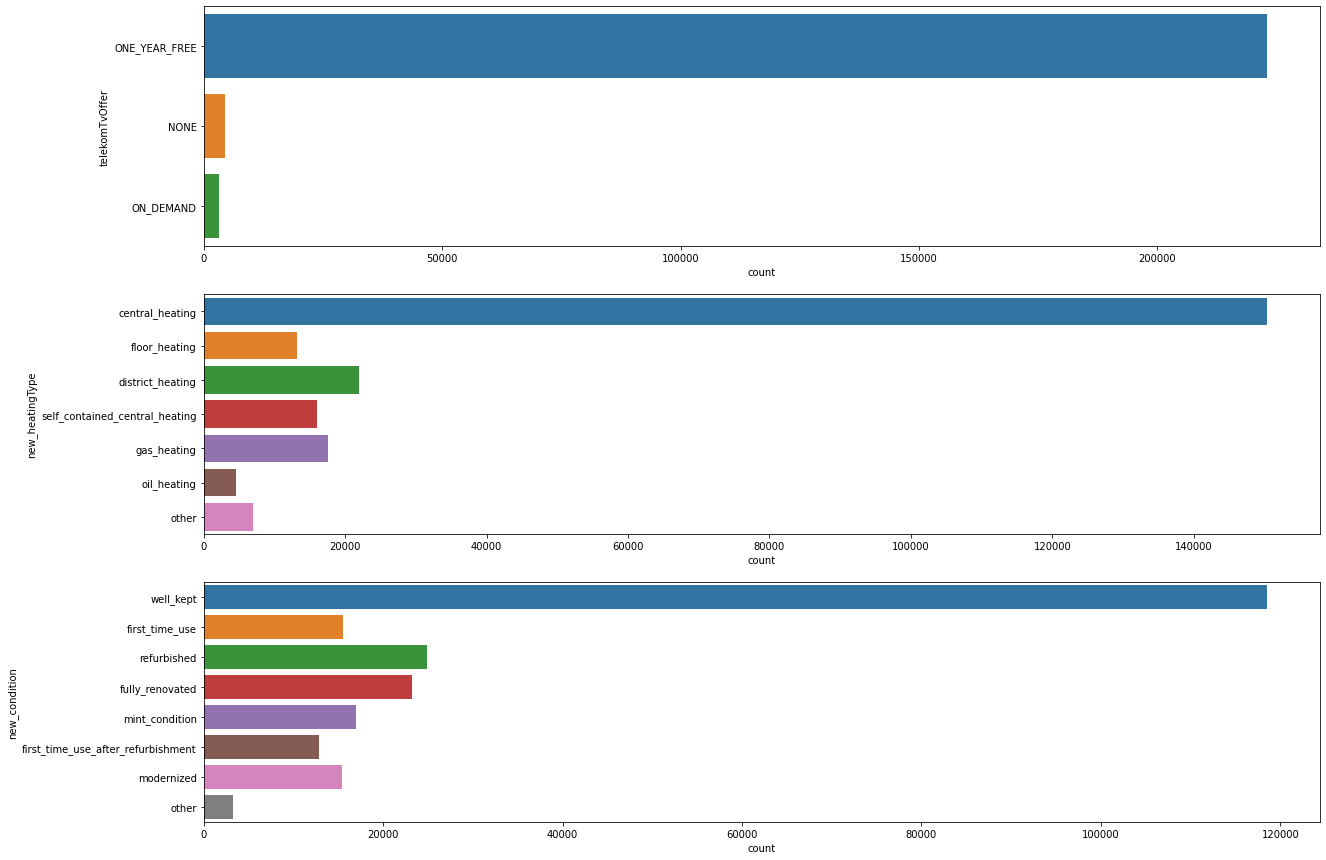

In [65]:
fig ,axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(20)

sns.countplot(y=dataset.telekomTvOffer,orient='v',ax=axs[0])
sns.countplot(y=dataset.new_heatingType,orient='v',ax=axs[1])
sns.countplot(y=dataset.new_condition,orient='v',ax=axs[2])

fig.show()

In [66]:
mean_baserent_in_states = dataset.groupby('new_regio1')['baseRent'].mean()

In [67]:
dataset.new_regio1.unique()

array(['Nordrhein_Westfalen', 'Sachsen', 'other', 'Baden_Württemberg',
       'Rheinland_Pfalz', 'Thüringen', 'Hessen', 'Niedersachsen',
       'Sachsen_Anhalt', 'Bayern'], dtype=object)

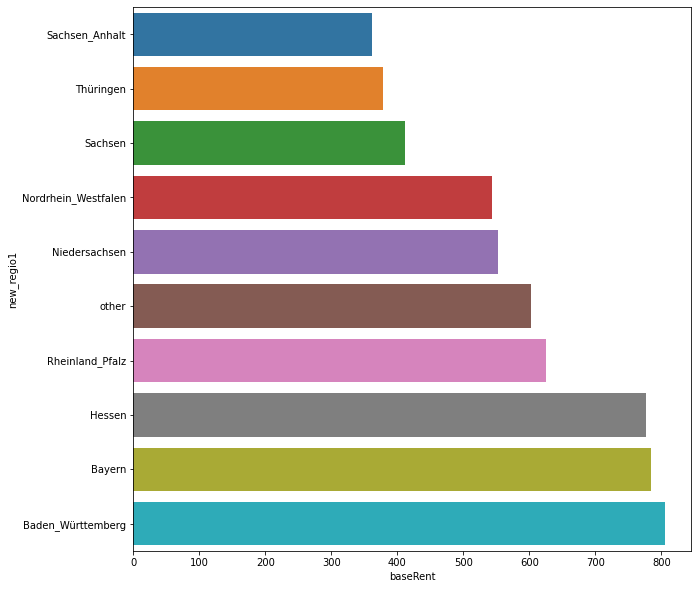

In [68]:
mean_baserent_in_states.sort_values(inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(y=mean_baserent_in_states.index,x=mean_baserent_in_states,orient='h')

Correlation matrix

In [69]:
corr_matrix = dataset.corr()

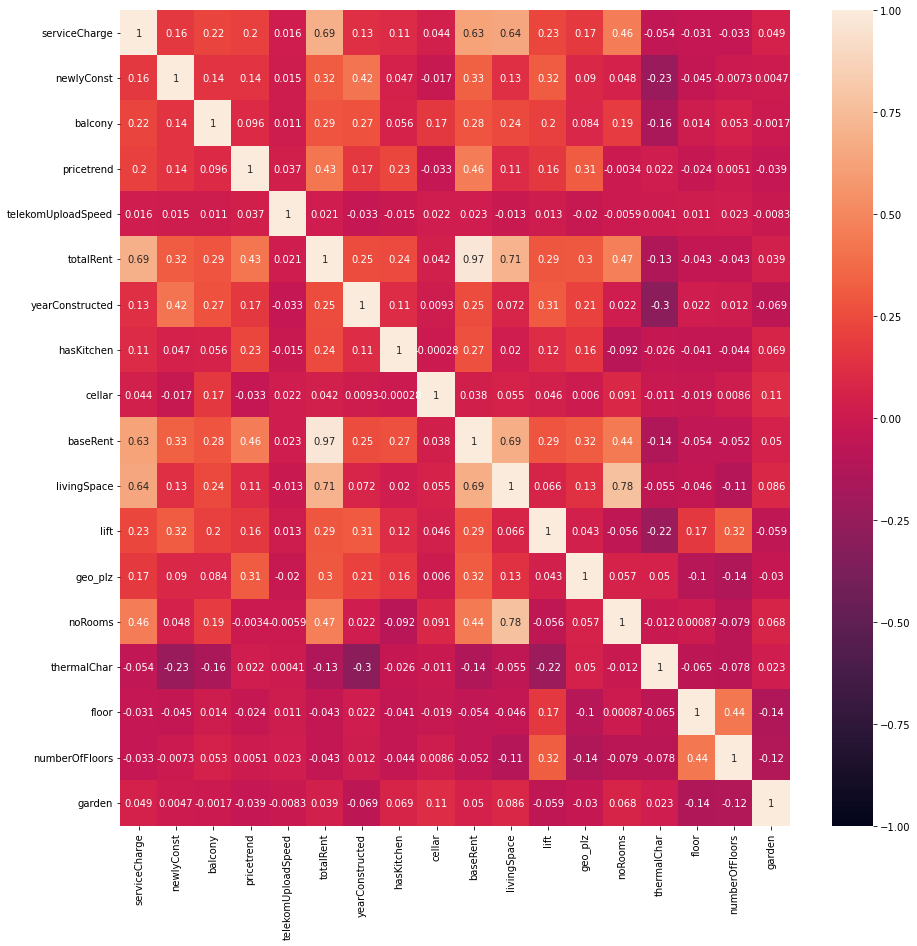

In [70]:
fig = plt.figure(figsize= (15,15))
sns.heatmap(corr_matrix,annot=True,vmax=1,vmin=-1)

In [71]:
abs_corr = abs(corr_matrix)
abs_corr['totalRent'].sort_values(ascending=False,)

totalRent             1.000000
baseRent              0.974718
livingSpace           0.708105
serviceCharge         0.688976
noRooms               0.467966
pricetrend            0.425838
newlyConst            0.317826
geo_plz               0.301666
lift                  0.294415
balcony               0.287009
yearConstructed       0.252692
hasKitchen            0.242620
thermalChar           0.130034
numberOfFloors        0.043367
floor                 0.043150
cellar                0.041610
garden                0.039251
telekomUploadSpeed    0.021166
Name: totalRent, dtype: float64

Delete baseRent due to data leakage 

In [72]:
baseRent = dataset.baseRent
dataset.drop('baseRent',axis=1,inplace=True)

#Model Training 

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

Split train and test dataset

In [199]:
data = dataset.drop(['totalRent'],axis=1)
target = dataset.totalRent

data_train , data_test,target_train , target_test = train_test_split(data,target,test_size=0.2,random_state=42)

Making a pipeline for preprocessing of dataset and then main model

In [200]:
cat_selector = make_column_selector(dtype_include=['bool','object'])
num_selector = make_column_selector(dtype_exclude=['bool','object'])
cat_cols = cat_selector(data_train)
numeric_cols = num_selector(data_train)
preprocessor  = ColumnTransformer([('cat_preprocessor',OneHotEncoder(),cat_cols),
                                   ('num_preprocessor',StandardScaler(),numeric_cols)])

In [201]:
%%time
lr_model = make_pipeline(preprocessor,LinearRegression(n_jobs=-1))
lr_model.fit(data_train,target_train)

CPU times: user 2.36 s, sys: 191 ms, total: 2.55 s
Wall time: 1.8 s


In [202]:
r2_score = lr_model.score(data_test,target_test)
print(f'R2 score of linear regression model on test dataset is {r2_score:.3f} .')

R2 score of linear regression model on test dataset is 0.776 .


In [203]:
y_predicted = lr_model.predict(data_test)
print(f'Mean absolute error of linear regression model on test dataset is {mean_absolute_error(y_predicted,target_test):.3f} ')

Mean absolute error of linear regression model on test dataset is 117.298 


Tuning linear regression with l2 penalty (Ridge)

In [204]:
%%time

ridge_model = Pipeline([('preprocessor',preprocessor), ('regressor',Ridge())])
param_grid = {
    'regressor__alpha' : [0.001,0.01,0.1,0,1,10,100,1000]
}
grid_search = GridSearchCV(ridge_model,param_grid= param_grid,cv=5,n_jobs=-1,scoring = 'neg_mean_absolute_error')
grid_search.fit(data_train,target_train)


CPU times: user 5.51 s, sys: 550 ms, total: 6.06 s
Wall time: 35.2 s


In [205]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res = cv_res[['mean_fit_time','mean_score_time','param_regressor__alpha', 'params','mean_test_score', 'std_test_score',
       'rank_test_score']]
cv_res.loc[:,'mean_test_score'] = -cv_res['mean_test_score']
cv_res.sort_values('rank_test_score')

,mean_fit_time,mean_score_time,param_regressor__alpha,params,mean_test_score,std_test_score,rank_test_score
0,1.105777,0.210289,0.001,{'regressor__alpha': 0.001},117.045032,0.293849,1
1,1.042271,0.189188,0.01,{'regressor__alpha': 0.01},117.045032,0.293849,2
2,1.017343,0.193777,0.1,{'regressor__alpha': 0.1},117.045036,0.293849,3
4,1.018809,0.204784,1,{'regressor__alpha': 1},117.045072,0.293845,4
5,0.993176,0.187589,10,{'regressor__alpha': 10},117.045481,0.293810,5
6,1.011519,0.198687,100,{'regressor__alpha': 100},117.053929,0.293779,6
3,2.867503,0.208313,0,{'regressor__alpha': 0},117.233490,0.398493,7
7,0.935624,0.174381,1000,{'regressor__alpha': 1000},117.330708,0.302168,8


In [206]:
grid_search.best_params_

{'regressor__alpha': 0.001}

In [207]:
mae = grid_search.score(data_test,target_test)
mae = -mae
print(f'MAE of ridge model : {mae:.3f}')

MAE of ridge model : 117.237


Also we test our model with baseRent feature

In [208]:
dataset_br= pd.concat([dataset,baseRent],axis=1)

In [209]:
data= dataset_br.drop(['totalRent'],axis=1)
target = dataset_br.totalRent

data_train , data_test,target_train , target_test = train_test_split(data,target,test_size=0.2,random_state=42)

cat_cols = cat_selector(data_train)
numeric_cols = num_selector(data_train)
preprocessor  = ColumnTransformer([('cat_preprocessor',OneHotEncoder(),cat_cols),
                                   ('num_preprocessor',StandardScaler(),numeric_cols)])

ridge = make_pipeline(preprocessor,Ridge())
ridge.fit(data_train,target_train)
y_predicted = ridge.predict(data_test)

print(f'MAE (with baseRent feature) : {mean_absolute_error(y_predicted,target_test):.3f}')

MAE (with baseRent feature) : 42.124


we got lower mae but it does not make sense in reality!!

#Multiprocessing

In [80]:
import multiprocessing
from multiprocessing import Pool,cpu_count

Creating pool and mapping preprocess function to dataset

In [82]:
def multiprocess_preprocessing(df, function, n_cores=4):
    """
    Splits dataframe into n_cores parts, then applies function on each of them and at last concatenates them into one dataframe 

    Parameters
    ----------
    df : pd.DataFrame
         dataframe of dataset
    function : python function
               the function which want to apply on dataset  
    n_cores : int
              number of cpu cores or any integer you want
    Returns
    -------
    df :  pd.DataFrame
          preprocessed dataframe
    """
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(function, df_split))
    pool.close()
    pool.join()
    return df

Gathering all preprocess steps into one function to compare multiprocess mode and single core mode

In [89]:
def preprocess(df):
  
  df.drop(columns=df.columns[df.isnull().sum()/len(df) > 0.5],inplace=True)
  df.drop(columns=['date','description','scoutId','picturecount','facilities','houseNumber','livingSpaceRange','yearConstructedRange','baseRentRange','noRoomsRange'],axis=1,inplace=True)
  df.drop(['street','streetPlain'],axis=1,inplace=True)
  # df.drop_duplicates(keep='last',inplace=True)
  df.totalRent.fillna(df.totalRent.median(),inplace=True)
  df.drop(df[df.baseRent >= df.totalRent].index,inplace=True)
  df.drop(df[df.totalRent == 0 ].index,inplace=True)
  df.drop(df[df['totalRent']>10000].index,inplace=True)
  df.drop(df[df['livingSpace'] == 0].index,inplace=True)
  df.fillna(numerical_cols.mean(),inplace=True)
  df.fillna(categorical_cols.mode().iloc[0],inplace= True)

  # for col in df.columns:
  #   if df[col].dtype == 'int64' or df[col].dtype == 'float64':
  #     outlier_indexes = detect_outlier(df,col)
  #     df.drop(outlier_indexes,inplace=True)
  
  df.drop(columns=['firingTypes','geo_krs','regio2','regio3','geo_bln'],inplace=True)

  df['new_regio1'] = df.regio1.apply(new_label_regio1)
  df.drop('regio1',axis=1,inplace=True)
  
  df['new_heatingType'] = df.heatingType.apply(new_label_heatingType)
  df.drop(columns='heatingType',inplace=True)

  df['new_typeOfFlat'] = df.typeOfFlat.apply(new_label_typeOfFlat)
  df.drop(columns='typeOfFlat',inplace=True)

  df['new_condition'] = df.condition.apply(new_label_condition)
  df.drop(columns='condition',inplace=True)
  return df

In [90]:
df = pd.read_csv('./immo_data.csv')

Single core :

In [98]:
%%time
new_df = df.copy()
new_df = preprocess(new_df)

CPU times: user 1.8 s, sys: 285 ms, total: 2.08 s
Wall time: 2.08 s


Multiprocess : 

In [109]:
%%time
multiprocess_df = df.copy()
multiprocess_df = multiprocess_preprocessing(multiprocess_df,preprocess,4)

CPU times: user 1.67 s, sys: 1.02 s, total: 2.69 s
Wall time: 6.19 s


##Multiprocessing using dask

In [111]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 136 kB 5.4 MB/s 
     |████████████████████████████████| 837 kB 51.4 MB/s 
     |████████████████████████████████| 830 kB 35.5 MB/s 
     |████████████████████████████████| 822 kB 43.2 MB/s 
     |████████████████████████████████| 802 kB 43.1 MB/s 
     |████████████████████████████████| 802 kB 39.7 MB/s 
     |████████████████████████████████| 793 kB 36.1 MB/s 
     |████████████████████████████████| 793 kB 46.1 MB/s 
     |████████████████████████████████| 791 kB 55.2 MB/s 
     |████████████████████████████████| 786 kB 42.6 MB/s 
     |████████████████████████████████| 779 kB 43.8 MB/s 
     |████████████████████████████████| 778 kB 38.8 MB/s 
     |████████████████████████████████| 776 kB 44.1 MB/s 
     |████████████████████████████████| 769 kB 44.6 MB/s 
     |████████████████████████████████| 766 kB 43.5 MB/s 
     |████████████████████████████████| 1.0 MB 42.5 MB/s 
     |████████████████████████████████| 722 kB 42.7 MB/s 
     |█████████

In [112]:
import dask
import dask.dataframe as dd

In [113]:
dask_dataset = dd.from_pandas(df,npartitions=2)

In [114]:
dask_dataset.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 49 entries, regio1 to date
dtypes: object(19), bool(6), float64(18), int64(6)

In [115]:
dask_dataset = dask_dataset.drop(dask_dataset.columns[dask_dataset.isnull().sum()/len(dask_dataset)>0.5],axis=1)

In [116]:
unuseful_cols =  ['street','streetPlain','date','description','scoutId','picturecount',"facilities",'houseNumber',
                  'livingSpaceRange','yearConstructedRange','baseRentRange','noRoomsRange']
dask_dataset = dask_dataset.drop(unuseful_cols,axis=1)

In [117]:
dask_dataset = dask_dataset.drop_duplicates(keep = 'last')

In [118]:
dask_dataset.totalRent.isnull().sum().compute()

40171

In [119]:
median = dataset.totalRent.median()
dask_dataset.totalRent = dask_dataset.totalRent.fillna(median)

In [120]:
dask_dataset = dask_dataset[~(dask_dataset.baseRent >= dask_dataset.totalRent)]

In [121]:
dask_dataset = dask_dataset[~( dask_dataset.totalRent == 0)]

In [122]:
dask_dataset = dask_dataset[~( dask_dataset.totalRent > 10000)]

In [123]:
dask_dataset = dask_dataset[~( dask_dataset.livingSpace == 0)]

In [135]:
dask_dataset= dask_dataset.fillna(numeric_cols.mean())

In [136]:
dask_dataset = dask_dataset.fillna(categorical_cols.mode().iloc[0])

In [137]:
dask_dataset.isnull().sum().compute()

regio1                0
serviceCharge         0
heatingType           0
telekomTvOffer        0
newlyConst            0
balcony               0
pricetrend            0
telekomUploadSpeed    0
totalRent             0
yearConstructed       0
firingTypes           0
hasKitchen            0
geo_bln               0
cellar                0
baseRent              0
livingSpace           0
geo_krs               0
condition             0
interiorQual          0
petsAllowed           0
lift                  0
typeOfFlat            0
geo_plz               0
noRooms               0
thermalChar           0
floor                 0
numberOfFloors        0
garden                0
regio2                0
regio3                0
dtype: int64

In [138]:
%%time
for col in dask_dataset.columns:
  if dask_dataset[col].dtype == 'int64' or dask_dataset[col].dtype == 'float64':
    upper = dask_dataset[col].mean() + 3 * dask_dataset[col].std()
    lower = dask_dataset[col].mean() - 3 * dask_dataset[col].std()
    
    dask_dataset= dask_dataset[~((dask_dataset[col] > upper) | (dask_dataset[col] < lower))]

CPU times: user 272 ms, sys: 1.66 ms, total: 273 ms
Wall time: 552 ms


In [139]:
dask_dataset = dask_dataset.drop(['firingTypes','geo_krs','regio2','regio3','geo_bln'],axis=1)

In [140]:

dask_dataset['new_regio1'] = dask_dataset.regio1.apply(new_label_regio1,meta=('regio1', 'object'))
dask_dataset = dask_dataset.drop('regio1',axis=1)
dask_dataset['new_heatingType'] = dask_dataset.heatingType.apply(new_label_heatingType,meta=('heatingType', 'object'))
dask_dataset = dask_dataset.drop('heatingType',axis=1)
dask_dataset['new_condition'] = dask_dataset.condition.apply(new_label_condition,meta=('condition', 'object'))
dask_dataset = dask_dataset.drop('condition',axis=1)
dask_dataset['new_typeOfFlat'] = dask_dataset.typeOfFlat.apply(new_label_typeOfFlat,meta=('typeOfFlat', 'object'))
dask_dataset = dask_dataset.drop('typeOfFlat',axis=1)

Gathering all preprocess steps of dask preprocessing

In [128]:
def dask_preprocess(dask_dataset):
  dask_dataset = dask_dataset.drop(dask_dataset.columns[dask_dataset.isnull().sum()/len(dask_dataset)>0.5],axis=1)
  unusefull_cols =  ['street','streetPlain','date','description','scoutId','picturecount',"facilities",'houseNumber',
                  'livingSpaceRange','yearConstructedRange','baseRentRange','noRoomsRange']
  dask_dataset = dask_dataset.drop(unusefull_cols,axis=1)
  # dask_dataset = dask_dataset.drop_duplicates(keep = 'last')
  median = dataset.totalRent.median()
  dask_dataset.totalRent = dask_dataset.totalRent.fillna(median)

  dask_dataset = dask_dataset[~(dask_dataset.baseRent >= dask_dataset.totalRent)]

  dask_dataset = dask_dataset[~( dask_dataset.totalRent == 0)]
  dask_dataset = dask_dataset[~( dask_dataset.totalRent > 10000)]
  dask_dataset = dask_dataset[~( dask_dataset.livingSpace == 0)]
  dask_dataset= dask_dataset.fillna(numeric_cols.mean())
  dask_dataset = dask_dataset.fillna(categorical_cols.mode().iloc[0])
  dask_dataset = dask_dataset.drop(['firingTypes','geo_krs','regio2','regio3','geo_bln'],axis=1)

  dask_dataset['new_regio1'] = dask_dataset.regio1.apply(new_label_regio1,meta=('regio1', 'object'))
  dask_dataset = dask_dataset.drop('regio1',axis=1)
  dask_dataset['new_heatingType'] = dask_dataset.heatingType.apply(new_label_heatingType,meta=('heatingType', 'object'))
  dask_dataset = dask_dataset.drop('heatingType',axis=1)
  dask_dataset['new_condition'] = dask_dataset.condition.apply(new_label_condition,meta=('condition', 'object'))
  dask_dataset = dask_dataset.drop('condition',axis=1)
  dask_dataset['new_typeOfFlat'] = dask_dataset.typeOfFlat.apply(new_label_typeOfFlat,meta=('typeOfFlat', 'object'))
  dask_dataset = dask_dataset.drop('typeOfFlat',axis=1)
  return dask_dataset

In [126]:
dask_df = dd.from_pandas(df,npartitions=2)

In [134]:
%%time
preprocess_by_dask = dask_preprocess(dask_df)

CPU times: user 1.08 s, sys: 13.6 ms, total: 1.09 s
Wall time: 1.04 s


#EXTRA 

##Training model by dask_ml

In [149]:
!pip install dask_ml --upgrade

  Using cached dask_ml-2022.1.22-py3-none-any.whl (148 kB)
  Attempting uninstall: dask-ml
    Found existing installation: dask-ml 1.1.1
    Uninstalling dask-ml-1.1.1:
      Successfully uninstalled dask-ml-1.1.1


In [192]:
import dask_ml
from dask_ml.model_selection import train_test_split , GridSearchCV
from dask_ml.preprocessing import StandardScaler, OneHotEncoder
from dask_ml.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [165]:
dask_data = dask_dataset.drop(['totalRent','baseRent'],axis=1)
dast_target = dask_dataset.totalRent

for col in dask_data.columns:
  if dask_data[col].dtype == 'object' or dask_data[col].dtype == 'bool' :
    dask_data[col] = dask_data[col].astype('category')

dask_data = dask_data.categorize()
dd_train , dd_test, dd_target_train , dd_target_test = train_test_split(dask_data,dast_target,test_size=0.2,random_state=42)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [166]:

cat_cols = dd_train.select_dtypes(include=['object','bool','category']).columns
numeric_cols = dd_train.select_dtypes(exclude=['bool','object','category']).columns
preprocessor  = ColumnTransformer([('cat_preprocessor',OneHotEncoder(sparse=False),cat_cols),
                                   ('num_preprocessor',StandardScaler(),numeric_cols)])

In [169]:
%%time
lr_dask = make_pipeline(preprocessor,LinearRegression(n_jobs=-1))
lr_dask.fit(dd_train,dd_target_train)

CPU times: user 11.5 s, sys: 597 ms, total: 12.1 s
Wall time: 10.5 s


In [180]:
r2_dask = lr_dask.score(dd_test,dd_target_test)
print('R2 score :', r2_dask)

R2 score : 0.7779968116303069


In [181]:
predicted = lr_dask.predict(dd_test)
mae = mean_absolute_error(predicted,dd_target_test)

print('MAE : ',mae)

MAE :  116.77508339831904


In [194]:
%%time

ridge_dask = Pipeline([('preprocessor',preprocessor), ('regressor',Ridge())])
param_grid = {
    'regressor__alpha' : [0.001,0.01,0.1,0,1,10,100,1000]
}
grid_search = GridSearchCV(ridge_dask,param_grid= param_grid,cv=5,n_jobs=-1,scoring = 'neg_mean_absolute_error')
grid_search.fit(dd_train,dd_target_train)


CPU times: user 40.5 s, sys: 6.76 s, total: 47.3 s
Wall time: 30.7 s


##Feature engineering


In [210]:
dataset = pd.read_csv('immo_data.csv')

Apply previous preprocessing and trying to create new feature to imporve model performance

In [211]:
unuseful_cols = ['street','streetPlain','date','description','scoutId','picturecount',"facilities",'houseNumber',
                  'livingSpaceRange','yearConstructedRange','baseRentRange','noRoomsRange']

In [212]:
dataset.drop(unuseful_cols,axis=1,inplace=True)

In [213]:
dataset.drop(dataset.columns[dataset.isnull().sum()/len(dataset)>0.5],axis=1,inplace=True)

In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   regio1              268850 non-null  object 
 1   serviceCharge       261941 non-null  float64
 2   heatingType         223994 non-null  object 
 3   telekomTvOffer      236231 non-null  object 
 4   newlyConst          268850 non-null  bool   
 5   balcony             268850 non-null  bool   
 6   pricetrend          267018 non-null  float64
 7   telekomUploadSpeed  235492 non-null  float64
 8   totalRent           228333 non-null  float64
 9   yearConstructed     211805 non-null  float64
 10  firingTypes         211886 non-null  object 
 11  hasKitchen          268850 non-null  bool   
 12  geo_bln             268850 non-null  object 
 13  cellar              268850 non-null  bool   
 14  baseRent            268850 non-null  float64
 15  livingSpace         268850 non-nul

In [215]:
dataset.drop(['firingTypes','geo_krs','regio2','regio3','geo_bln'],axis=1,inplace=True)

In [216]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   regio1              268850 non-null  object 
 1   serviceCharge       261941 non-null  float64
 2   heatingType         223994 non-null  object 
 3   telekomTvOffer      236231 non-null  object 
 4   newlyConst          268850 non-null  bool   
 5   balcony             268850 non-null  bool   
 6   pricetrend          267018 non-null  float64
 7   telekomUploadSpeed  235492 non-null  float64
 8   totalRent           228333 non-null  float64
 9   yearConstructed     211805 non-null  float64
 10  hasKitchen          268850 non-null  bool   
 11  cellar              268850 non-null  bool   
 12  baseRent            268850 non-null  float64
 13  livingSpace         268850 non-null  float64
 14  condition           200361 non-null  object 
 15  interiorQual        156185 non-nul

In [217]:
dataset.drop(dataset[dataset.livingSpace == 0].index,inplace=True)

create new rent / meter feature

In [218]:
dataset['rent_per_meter'] = dataset.baseRent / dataset.livingSpace

In [219]:
dataset.drop_duplicates(keep='last',inplace=True)

In [220]:
dataset.totalRent.fillna(dataset.totalRent.median(),inplace=True)

In [221]:
dataset.drop(dataset[dataset.baseRent >= dataset.totalRent].index,axis=0,inplace=True)

In [222]:
dataset.drop(dataset.loc[dataset['totalRent']>10000].index,axis=0,inplace=True)

In [223]:
dataset.drop(dataset[dataset.totalRent == 0 ].index,inplace=True)

In [224]:
for col in dataset.columns:
  if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
    outlier_indexes = detect_outlier(dataset,col)
    print(col,' ',len(outlier_indexes))
    dataset.drop(outlier_indexes,inplace=True)

serviceCharge   63
pricetrend   2104
telekomUploadSpeed   140
totalRent   4220
yearConstructed   968
baseRent   4284
livingSpace   11
geo_plz   0
noRooms   27
thermalChar   1052
floor   367
numberOfFloors   51
rent_per_meter   2014


In [225]:
mean_of_numeric_cols = dataset.select_dtypes(exclude = ['bool','object'] ).mean()
dataset.fillna(mean_of_numeric_cols,inplace=True)

In [226]:
mode_of_categorical_cols = dataset.select_dtypes(include = ['bool','object'] ).mode()
dataset.fillna(mode_of_categorical_cols.iloc[0],inplace=True)

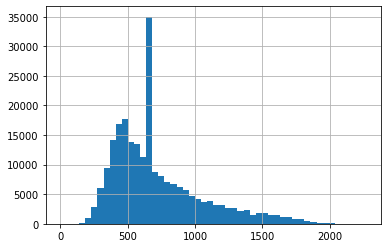

In [227]:
dataset.totalRent.hist(bins=50)

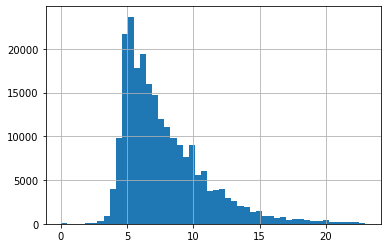

In [242]:
dataset.rent_per_meter.hist(bins=50)

In [229]:
states = dataset.groupby('regio1')['baseRent'].mean()

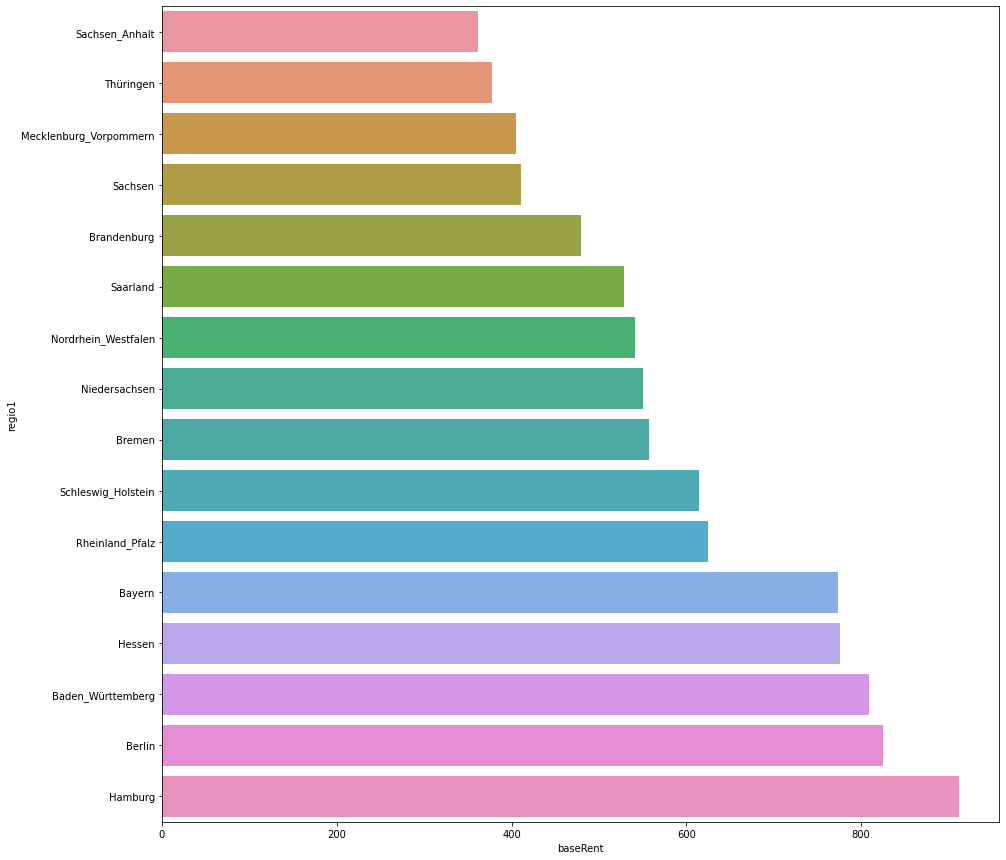

In [230]:
states.sort_values(inplace=True)
plt.figure(figsize=(15,15))
sns.barplot(y=states.index,x=states,orient='h')

In [231]:
corr = dataset.corr()

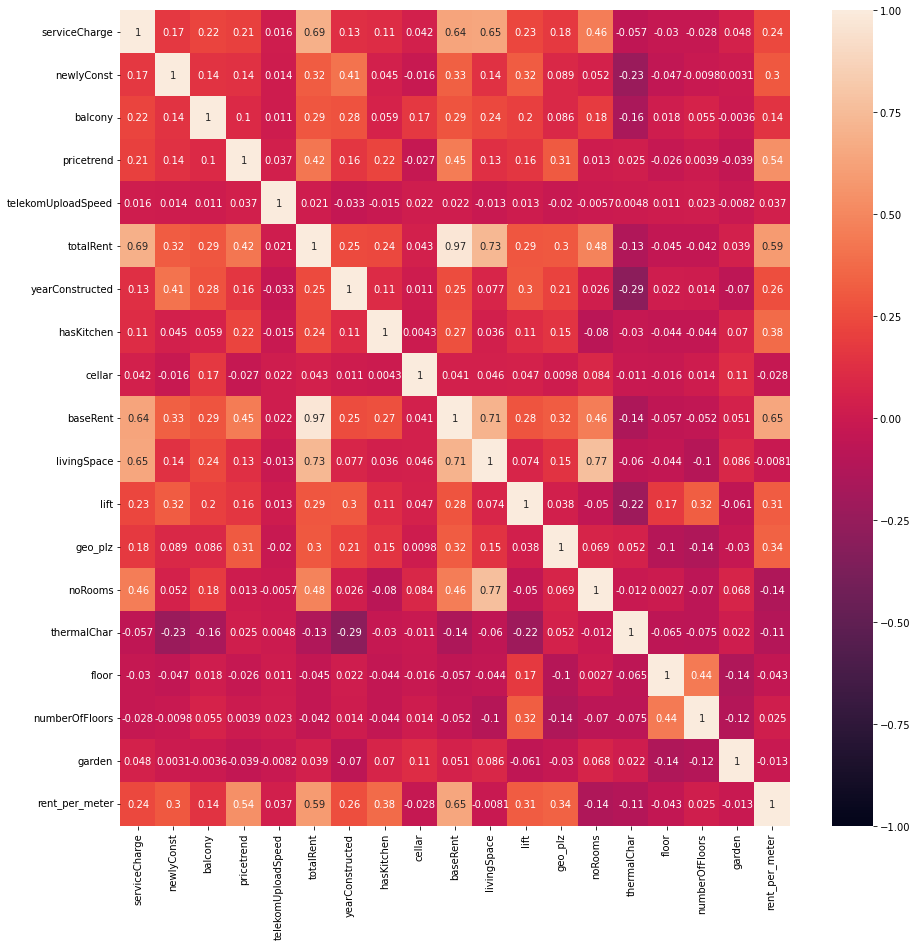

In [232]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1)

In [233]:
corr['totalRent'].sort_values()

thermalChar          -0.130009
floor                -0.045240
numberOfFloors       -0.042011
telekomUploadSpeed    0.020659
garden                0.039476
cellar                0.043489
hasKitchen            0.238743
yearConstructed       0.249806
balcony               0.289966
lift                  0.291515
geo_plz               0.298839
newlyConst            0.318860
pricetrend            0.422170
noRooms               0.482830
rent_per_meter        0.588281
serviceCharge         0.694413
livingSpace           0.727831
baseRent              0.974667
totalRent             1.000000
Name: totalRent, dtype: float64

In [234]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder , StandardScaler
from sklearn.compose import make_column_selector,ColumnTransformer
from sklearn.pipeline import make_pipeline

Also delete baseRent for data leakage

In [243]:
data = dataset.drop(['totalRent','baseRent'],axis=1)
target = dataset.totalRent
data_train , data_test ,target_train,target_test = train_test_split(data,target,test_size=0.2,random_state=42)

In [247]:
cat_selector = make_column_selector(dtype_include=['bool','object'])
num_selector = make_column_selector(dtype_exclude=['bool','object'])
cat_cols = cat_selector(data_train)
numeric_cols = num_selector(data_train)
preprocessor  = ColumnTransformer([('cat_preprocessor',OneHotEncoder(handle_unknown='ignore',sparse=False),cat_cols),
                                   ('num_preprocessor',StandardScaler(),numeric_cols)])

Ridge model

In [248]:
ridge = make_pipeline(preprocessor,Ridge())

In [249]:
ridge.fit(data_train,target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['regio1', 'heatingType',
                                                   'telekomTvOffer',
                                                   'newlyConst', 'balcony',
                                                   'hasKitchen', 'cellar',
                                                   'condition', 'interiorQual',
                                                   'petsAllowed', 'lift',
                                                   'typeOfFlat', 'garden']),
                                                 ('num_preprocessor',
                                                  StandardScaler(),
                                                  ['service

In [250]:
ridge_score = ridge.score(data_test,target_test)
print(f'ridge score : {ridge_score:.3f}')

ridge score : 0.905


In [251]:
ridge_predicted =  ridge.predict(data_test)
print(f'MAE of ridge model : {mean_absolute_error(target_test,ridge_predicted):.3f}')

MAE of ridge model : 68.692


KNN

In [255]:
knn = make_pipeline(preprocessor,KNeighborsRegressor(n_neighbors=7))

In [256]:
knn.fit(data_train,target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['regio1', 'heatingType',
                                                   'telekomTvOffer',
                                                   'newlyConst', 'balcony',
                                                   'hasKitchen', 'cellar',
                                                   'condition', 'interiorQual',
                                                   'petsAllowed', 'lift',
                                                   'typeOfFlat', 'garden']),
                                                 ('num_preprocessor',
                                                  StandardScaler(),
                                                  ['service

In [257]:
knn_predicted =  knn.predict(data_test)
print(f'MAE of KNN : {mean_absolute_error(target_test,knn_predicted)} ')

MAE of KNN : 84.65399709550394 
